# Chapter 32

# Introduction to PyTorch

## Installing PyTorch and tools

[https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

### Windows

`pip3 install torch==1.10.0+cu102 torchvision==0.11.1+cu102 torchaudio===0.10.0+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html`

### MacOS   

**MacOS Binaries dont support CUDA, install from source if CUDA is needed**   
`pip3 install torch torchvision torchaudio`

## Verifying PyTorch

In [174]:
import torch

torch.__version__

'1.10.0+cu102'

In [175]:
import torch

x = torch.rand(5, 3)
print(x)

tensor([[0.7119, 0.3197, 0.7191],
        [0.2349, 0.8828, 0.1977],
        [0.4575, 0.8050, 0.6880],
        [0.2720, 0.9867, 0.2801],
        [0.6803, 0.4641, 0.5783]])


In [176]:
import torchvision

torchvision.__version__

'0.11.1+cu102'

## Check for GPU and CUDA Enabled

In [177]:
import torch
torch.cuda.is_available()

True

In [178]:
import torch
torch.cuda.current_device()

0

## Install Other Tools or packages

In [179]:
!pip install -q matplotlib
!pip install -q pandas


In [180]:
import matplotlib.pyplot 

#matplotlib._get_version()
matplotlib.__version__

'3.2.2'

In [181]:
import pandas 
pandas.__version__

'1.3.4'

## QuickStart From PyTorch Website

In [182]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np
import random


In [183]:
# # Download training data from open datasets.
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # Download test data from open datasets.
# test_data = datasets.FashionMNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )# Download training data from open datasets.
# training_data = datasets.FashionMNIST(
#     root="data",
#     train=True,
#     download=True,
#     transform=ToTensor(),
# )

# # Download test data from open datasets.
# test_data = datasets.FashionMNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor(),
# )

In [184]:
# import os
# import pandas as pd
# from torchvision.io import read_image
# import torch
# from torch.utils.data import Dataset
# from torchvision import datasets
# from torchvision.transforms import ToTensor
# import matplotlib.pyplot as plt
# import torchvision.transforms as transforms

# class CustomImageDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

# csvFile = 'pytorch_dataset.csv'
# rootDir = 'pytorch_dataset'
# dataset = CustomImageDataset(csvFile,rootDir, transform = transforms.ToTensor())

In [185]:
testdatasetFileName = "master_dataset.npz"


with np.load(testdatasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels'].astype('int64')
    dataLabelNames = data['labelnames']


print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)


object
int64
<U10


In [186]:
import cv2 as cv

desiredShape = (200, 200, 3)

N = len(dataImages)
shape = (N, desiredShape[0], desiredShape[1], desiredShape[2])

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)

dataImages = y

dataImages.dtype, y.dtype, y.shape

(dtype('uint8'), dtype('uint8'), (423, 200, 200, 3))

In [187]:
dataImages.dtype,dataImages.shape


(dtype('uint8'), (423, 200, 200, 3))

In [188]:
dataImages = dataImages / 255.0

In [189]:
dataImages.dtype

dtype('float64')

In [190]:
dataset = torch.tensor(dataImages)

all_data = []
for i in range(len(dataset)):
    all_data.append([dataset[i],dataLabels[i]])


random.shuffle(all_data)



In [191]:
train_split = int(len(all_data)*0.75)
test_spilt = len(all_data)-train_split
training_data, test_data = torch.utils.data.random_split(all_data,[train_split,test_spilt])

In [192]:
len(training_data), len(test_data)

(317, 106)

In [193]:
classes = {0: 'afiq', 1: 'azureen', 2: 'gavin', 3: 'goke',  4: 'inamul', 5: 'jincheng', 6: 'mahmuda', 7: 'numan', 8: 'saseendran'}

In [194]:
X, y = training_data[0]
print(X.shape)
print(X.squeeze().shape)
print(y)


torch.Size([200, 200, 3])
torch.Size([200, 200, 3])
1


In [195]:
X.dtype

torch.float64

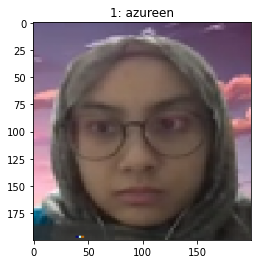

In [196]:
import matplotlib.pyplot as plt

img = X.squeeze()
plt.imshow(img)#, cmap="gray")
plt.title(f"{y}: {classes[y]}")
plt.show()

torch.Size([200, 200, 3])
torch.Size([200, 200, 3])
4


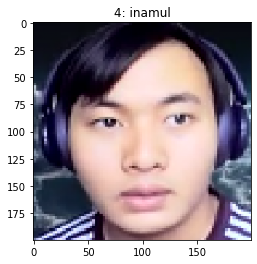

In [197]:
import matplotlib.pyplot as plt


X, y = test_data[33]
print(X.shape)
print(X.squeeze().shape)
print(y)

img = X.squeeze()
plt.imshow(img)#, cmap="gray")
plt.title(f"{y}: {classes[y]}")
plt.show()

### Dataloader

In [198]:
batch_size = 20

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([20, 200, 200, 3])
Shape of y:  torch.Size([20]) torch.int64


### Create Model

In [199]:
import torch

# Get cpu or gpu device for training.
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
print(f"Using {device} device")

input_size = 3*200*200
output_size = 9
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, output_size)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=120000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=9, bias=True)
  )
)


### Model Parameter

In [200]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [201]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return loss, current 

In [202]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, correct

### Train

In [203]:
epochs = 30
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.209985  [    0/  317]
Test Error: 
 Accuracy: 14.2%, Avg loss: 2.162181 

Epoch 2
-------------------------------
loss: 2.178174  [    0/  317]
Test Error: 
 Accuracy: 14.2%, Avg loss: 2.137294 

Epoch 3
-------------------------------
loss: 2.150523  [    0/  317]
Test Error: 
 Accuracy: 15.1%, Avg loss: 2.111587 

Epoch 4
-------------------------------
loss: 2.120457  [    0/  317]
Test Error: 
 Accuracy: 16.0%, Avg loss: 2.083787 

Epoch 5
-------------------------------
loss: 2.089541  [    0/  317]
Test Error: 
 Accuracy: 20.8%, Avg loss: 2.055654 

Epoch 6
-------------------------------
loss: 2.058464  [    0/  317]
Test Error: 
 Accuracy: 24.5%, Avg loss: 2.026853 

Epoch 7
-------------------------------
loss: 2.026183  [    0/  317]
Test Error: 
 Accuracy: 27.4%, Avg loss: 1.997671 

Epoch 8
-------------------------------
loss: 1.992906  [    0/  317]
Test Error: 
 Accuracy: 33.0%, Avg loss: 1.967864 

Epoch 9
----------------

KeyboardInterrupt: 

### Save Model

In [204]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Load Model

In [205]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [160]:
i = 45
model.eval()
x, y = test_data[i][0], test_data[i][1]
x=x.view(1,-1)
#print(x.dtype,x.shape)
with torch.no_grad():
    pred = model(x.float())
    predicted, actual = classes[pred[0].argmax(0).item()], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "goke", Actual: "azureen"


In [173]:
# epoch 10 max iter 5 save file with acc value
maxIterations = 5
testAccList = []
thresholdAcc = 0.0
lastTestAcc = 0.0


testLoss = 0.0
testAcc = 0.0
modelDir = 'torch_model'
epoch = 30

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end='... ')

    for t in range(epoch):
        
        loss, current = train(train_dataloader, model, loss_fn, optimizer)
        test_loss, test_acc = test(test_dataloader, model, loss_fn)
        


    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        # SavedModel format
        torch.save(model.state_dict(), "torch_model_max.pth")
        print("Saved PyTorch Model State to torch_model_max.pth")

        thresholdAcc = testAcc
        
    print('.')
    


simulation 1... loss: 2.213589  [    0/  317]
Test Error: 
 Accuracy: 38.7%, Avg loss: 2.171415 

loss: 2.175574  [    0/  317]
Test Error: 
 Accuracy: 49.1%, Avg loss: 2.150776 

loss: 2.148128  [    0/  317]
Test Error: 
 Accuracy: 46.2%, Avg loss: 2.129598 

loss: 2.119854  [    0/  317]
Test Error: 
 Accuracy: 44.3%, Avg loss: 2.107110 

loss: 2.090430  [    0/  317]
Test Error: 
 Accuracy: 46.2%, Avg loss: 2.083668 

loss: 2.059077  [    0/  317]
Test Error: 
 Accuracy: 46.2%, Avg loss: 2.058839 

loss: 2.024928  [    0/  317]
Test Error: 
 Accuracy: 43.4%, Avg loss: 2.032746 

loss: 1.987728  [    0/  317]
Test Error: 
 Accuracy: 43.4%, Avg loss: 2.005561 

loss: 1.948356  [    0/  317]
Test Error: 
 Accuracy: 42.5%, Avg loss: 1.977363 

loss: 1.906676  [    0/  317]
Test Error: 
 Accuracy: 40.6%, Avg loss: 1.948104 

loss: 1.863337  [    0/  317]
Test Error: 
 Accuracy: 42.5%, Avg loss: 1.917879 

loss: 1.819356  [    0/  317]
Test Error: 
 Accuracy: 50.0%, Avg loss: 1.886161 



In [ ]:
layerSoftMax = nn.Softmax()
predictions = layerSoftMax(pred)
predictions